In [1]:
import seaborn as sns
import pandas as pd
import numpy as np 

In [6]:
df =  pd.read_csv('titanic.csv')
df.head(3)

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1


In [ ]:
df['number'].unique() ## A == Alone 

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers Travelling With')

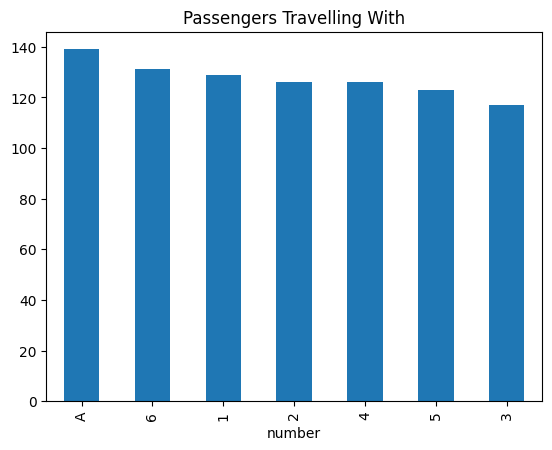

In [9]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers Travelling With')

In [10]:
## Extract Numerical part 
df['number_num'] = pd.to_numeric(df['number'],errors='coerce',downcast='integer')

In [16]:
df['number_num'] = df['number_num'].replace(np.nan , 0).astype(int) 
df['number_num']

0      5
1      3
2      6
3      3
4      0
      ..
886    3
887    3
888    1
889    2
890    3
Name: number_num, Length: 891, dtype: int64

In [17]:
## Extract Categorical Part
df['num_cat']= np.where(df['number_num'].isnull(),df['number'],np.nan)

In [19]:
df['num_cat'].unique()

array([nan], dtype=object)

In [20]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [21]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [26]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)')
## Captures numerical part  
df['cabin_cat'] = df['Cabin'].str[0]
## Captures the first letter 
df.head(3)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\pawar\AppData\Local\Temp\ipykernel_9740\2216823251.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num'] = df['Cabin'].str.extract('(\d+)')


,Cabin,Ticket,number,Survived,number_num,num_cat,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5,NaN,NaN,NaN
1,C85,PC 17599,3,1,3,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6,NaN,NaN,NaN


<Axes: xlabel='cabin_cat'>

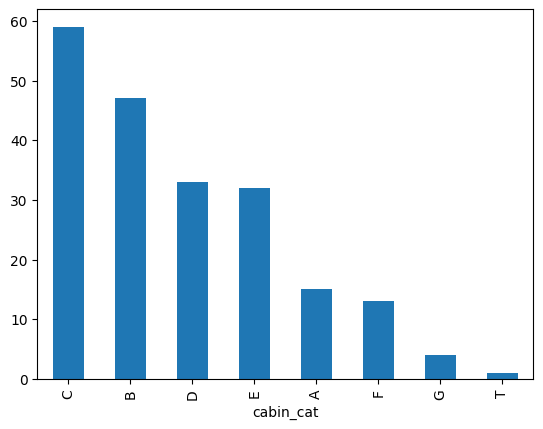

In [27]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [29]:
df['Ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['Ticket_num'] = pd.to_numeric(df['Ticket_num'],errors='coerce',downcast='integer')
# Extract The First Part of ticket as category 
df['Ticket_cat'] = df['Ticket'].apply(lambda s : s.split()[0])
df['Ticket_cat'] = np.where(df['Ticket_cat'].str.isdigit(),np.nan,df['Ticket_cat'])

In [30]:
df.head(3)

,Cabin,Ticket,number,Survived,number_num,num_cat,cabin_num,cabin_cat,Ticket_num,Ticket_cat
0,NaN,A/5 21171,5,0,5,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6,NaN,NaN,NaN,3101282.0,STON/O2.


In [31]:
df['Ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)